294


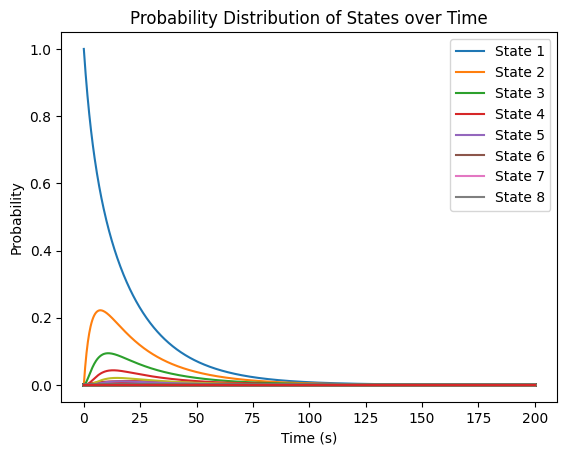

<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import plotly.graph_objects as go
import csv
import ast

trajectories=[]

with open('C:/Users/muska/Desktop/Github_projects/Stochastic_Analysis/trajectories.csv', "r") as csvfile:
    csvreader = csv.reader(csvfile)
    for trajectory in csvreader:
        trajectories.append([ast.literal_eval(element) for element in trajectory])

states = []

k1 = 0.1
k2 = 0.1
k3 = 0.1
k4 = 0.002

for trajectory in trajectories:
    for state in trajectory:
        if state not in states:
            states.append(state)
        
print(len(states))

def A(state,index):
    if index==0:
        return k1

    if index==1:
        return k2*state[0]

    if index==2:
        return k3*state[0]
    
    if index==3:
        return k4*state[1]

V=[
    [1,0],
    [-1,1],
    [-1,0],
    [0,-1]
]

Q_Matrix=np.zeros((len(states),len(states)))

for i in range(len(states)):
    for j in range(len(states)):
        v=np.array(states[j])-np.array(states[i])

        try:
            index=V.index(v.tolist())
            Q_Matrix[i][j]=A(states[i],index)
        except ValueError:
            Q_Matrix[i][j]=0

for i in range(Q_Matrix.shape[0]):
    Q_Matrix[i][i]=-np.sum(Q_Matrix[i])


init_prob=np.zeros((len(states)))
init_prob[0]=1

t_eval = np.linspace(0, 200, 1000)
def cme_odes(t, y):
    return np.dot(Q_Matrix, y)

solution = solve_ivp(cme_odes, t_span=(0, 200), y0=init_prob, t_eval=t_eval, method='RK45')

for i in range(len(solution.y)):
    plt.plot(solution.t, solution.y[i])

plt.title('Probability Distribution of States over Time')
plt.xlabel('Time (s)')
plt.ylabel('Probability')
plt.legend(['State 1','State 2','State 3','State 4','State 5','State 6','State 7','State 8'])
plt.savefig('Probability_Distribution_of_States.png')
plt.show()
